### Predicting Customer Churn with Machine Learning
+ Customer churn refers to when a customer (player, subscriber, user, etc.) ceases his or her relationship with a company.
+ Online businesses typically treat a customer as churned once a particular amount of time has elapsed since the customer's last interaction with the site or service.

In [62]:
# load EDA Pkgs
import pandas as pd
import numpy as np

In [63]:
# Load Vis Packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
# Load ML Pkgs
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [65]:
# Load Dataset
df = pd.read_csv("data/customer_churn_dataset.csv")

In [66]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [67]:
# Shape
df.shape

(10000, 14)

In [68]:
# Columns
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [69]:
# Descriptive Statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [70]:
# Check For Missing Values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [71]:
# Datatypes
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [72]:
# Value Counts
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

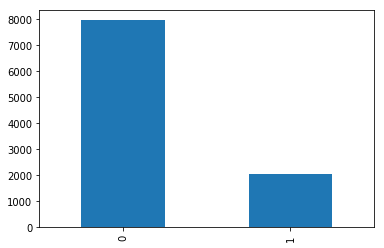

In [73]:
df['Exited'].value_counts().plot(kind='bar')

### Feature Engineering and Encoding

In [74]:
df.dtypes[df.dtypes == 'object']

Surname      object
Geography    object
Gender       object
dtype: object

### Narative
+ Hence we have to encode these values
+ LabelEncoder
+ One-Hot Encoding pd.get_dummies()
+ Custom Fxn

### using Custom Fxn

In [75]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [76]:
d_geo = { ni: n for n,ni  in enumerate(set(df['Geography'].unique()))}

In [77]:
d_geo 

{'France': 0, 'Germany': 1, 'Spain': 2}

In [78]:
d_gender = {'Female': 0, 'Male': 1}

In [79]:
d_gender

{'Female': 0, 'Male': 1}

In [80]:
df2 = df

In [81]:
df2['Geography']

0        France
1         Spain
2        France
3        France
4         Spain
5         Spain
6        France
7       Germany
8        France
9        France
10       France
11        Spain
12       France
13       France
14        Spain
15      Germany
16      Germany
17        Spain
18        Spain
19       France
20       France
21        Spain
22        Spain
23       France
24       France
25       France
26      Germany
27       France
28      Germany
29       France
         ...   
9970     France
9971     France
9972     France
9973     France
9974     France
9975    Germany
9976     France
9977     France
9978     France
9979     France
9980      Spain
9981    Germany
9982    Germany
9983     France
9984    Germany
9985     France
9986    Germany
9987      Spain
9988     France
9989      Spain
9990    Germany
9991     France
9992      Spain
9993     France
9994     France
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length:

In [82]:
# Map Geography to Encode
df2['Geography'] = df2['Geography'].map(d_geo)

In [83]:
df2['Geography'].head()

0    0
1    2
2    0
3    0
4    2
Name: Geography, dtype: int64

In [86]:
# Map Gender to Encode
df2['Gender'] = df2['Gender'].map(d_gender)

In [87]:
df2['Gender']

0       0
1       0
2       0
3       0
4       0
5       1
6       1
7       0
8       1
9       1
10      1
11      1
12      0
13      0
14      0
15      1
16      1
17      0
18      1
19      0
20      1
21      0
22      0
23      1
24      0
25      1
26      1
27      1
28      0
29      1
       ..
9970    1
9971    0
9972    1
9973    1
9974    1
9975    1
9976    0
9977    0
9978    1
9979    0
9980    1
9981    1
9982    0
9983    1
9984    1
9985    1
9986    1
9987    1
9988    1
9989    1
9990    1
9991    0
9992    1
9993    1
9994    0
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64

In [88]:
df2.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [89]:
df2.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


#### Narative
+ We need to drop some columns

In [90]:
df2.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [91]:
Xfeatures = df2[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]

In [92]:
ylabels = df2['Exited']

### Split Dataset

In [93]:
# Split Dataset
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.33,random_state=42)

In [94]:
print(df2.shape)
print(x_train.shape)

(10000, 14)
(6700, 10)


### Building Models

In [95]:
logit = LogisticRegression()
logit.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [96]:
print("Accuracy Score:",logit.score(x_test,y_test))

Accuracy Score: 0.8003030303030303


In [101]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
6340    0
576     0
5202    1
6363    0
439     0
2750    1
7487    1
5272    1
5653    0
3999    0
6033    0
582     0
9930    0
7051    0
8158    0
9896    0
2249    0
4640    1
9485    0
4947    0
9920    1
1963    0
8243    0
6590    0
8847    0
       ..
4304    0
7445    1
428     0
7068    1
6364    0
4215    1
426     0
2223    0
100     0
9244    0
3307    0
2762    0
5857    1
4738    1
7092    0
9632    0
3286    0
7712    0
7868    0
6067    0
9235    0
3577    0
1465    0
7675    0
2234    1
1744    0
9754    0
6094    0
8781    0
9401    1
Name: Exited, Length: 3300, dtype: int64

### Check Prediction Performance


In [99]:
# Making Prediction on Test Dataset
y_pred = logit.predict(x_test)

In [100]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [103]:
cm = confusion_matrix(y_test, y_pred)

In [104]:
cm

array([[2581,   76],
       [ 583,   60]])

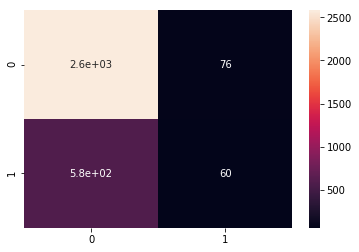

In [105]:
sns.heatmap(cm,annot=True)

In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2657
           1       0.44      0.09      0.15       643

   micro avg       0.80      0.80      0.80      3300
   macro avg       0.63      0.53      0.52      3300
weighted avg       0.74      0.80      0.74      3300



### Save Models

In [107]:
import joblib

In [108]:
customer_churn_logit_model = open("customer_churn_logit_model.pkl","wb")
joblib.dump(logit,customer_churn_logit_model)
customer_churn_logit_model.close()

### Using Naive Bayes

In [109]:
### Naive Bayes
nv = MultinomialNB()
nv.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [110]:
print("Accuracy Score:",nv.score(x_test,y_test))

Accuracy Score: 0.5342424242424243


#### Save Models

In [111]:
customer_churn_nv_model = open("customer_churn_nv_model.pkl","wb")
joblib.dump(nv,customer_churn_nv_model)
customer_churn_nv_model.close()

### using Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [114]:
print("Accuracy Score:",rf.score(x_test,y_test))

Accuracy Score: 0.8281818181818181


In [115]:
customer_churn_rf_model = open("customer_churn_rf_model.pkl","wb")
joblib.dump(rf,customer_churn_rf_model)
customer_churn_rf_model.close()

### Intepreting Model
+ Eli5
+ Shap
+ Lime

In [116]:
import eli5

In [117]:
# Show The Weight of Each Feature of Our Model
eli5.show_weights(logit)

Weight?,Feature
+0.047,x3
+0.002,x1
+0.000,x5
-0.000,x9
-0.003,x7
-0.004,<BIAS>
-0.005,x0
-0.007,x6
-0.011,x2
-0.017,x8


In [118]:
df2.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [120]:
feature_names = ['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']

In [121]:
eli5.show_weights(logit,feature_names = feature_names)

Weight?,Feature
+0.047,Age
+0.002,Geography
+0.000,Balance
-0.000,EstimatedSalary
-0.003,HasCrCard
-0.004,<BIAS>
-0.005,CreditScore
-0.007,NumOfProducts
-0.011,Gender
-0.017,IsActiveMember


In [125]:
# With the Class
class_names = ["No Churn","Churn"]

In [126]:
eli5.show_weights(logit,feature_names = feature_names,target_names = class_names)

Weight?,Feature
+0.047,Age
+0.002,Geography
+0.000,Balance
-0.000,EstimatedSalary
-0.003,HasCrCard
-0.004,<BIAS>
-0.005,CreditScore
-0.007,NumOfProducts
-0.011,Gender
-0.017,IsActiveMember


### Single Prediction

In [130]:
x_test.iloc[0]

CreditScore          596.00
Geography              1.00
Gender                 1.00
Age                   32.00
Tenure                 3.00
Balance            96709.07
NumOfProducts          2.00
HasCrCard              0.00
IsActiveMember         0.00
EstimatedSalary    41788.37
Name: 6252, dtype: float64

In [131]:
logit.predict([x_test.iloc[0]])

array([0])

In [133]:
eli5.show_prediction(logit,x_test.iloc[0],feature_names = feature_names,target_names = class_names)